<p style="text-align: center; font-size: 28px">Can We Predict and Identify Potential Employee Attrition Before it Occurs?</p>

<p style="text-align: center;">George Cancro</p>

___

### Motivation

Employee attrition is the process of an employee leaving an organization. Attrition can happen for a variety of reasons, such as retirement, job loss, or resignation. When an employee leaves, it can have a negative impact on the organization, as it can lead to a loss in productivity, knowledge, and skills. Attrition can also lead to increased costs, as the organization may need to hire and train new employees to replace the ones who have left.


Employee attrition is a huge problem for businesses. It's expensive to hire and train new employees, and losing good employees can hurt morale and productivity. A good prediction model can help a business reduce employee attrition by identifying employees who are at risk of leaving and taking steps to keep them happy and engaged. For example, if an organization knows that a certain percentage of employees are likely to leave in the next year, it can take steps to improve working conditions or offer incentives to stay. Additionally, predicting employee attrition can help organizations plan for turnover and ensure that they have the necessary staffing levels. If any specific circumstances directly correlate with that employee leaving, it would be cruical for the employers to know them.

___

### Getting Started with Data

The following dataset is the IBM HR Analytics Employee Attrition & Performance data, which has been posted to Kaggle.

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download

This data stands out for the wide variety of features included, as well as the high usability, so I can get started without having to do any scraping and preprocessing.

All packages needed to this exploration are located in requirements.txt file. We can install them to our environment first.

This notebook is written in Python3.9.12, with pip 21.2.4. Exact package version can be found in the requiremnts.txt file

In [16]:
# uncomment this to install packages
# !pip install -r requirements.txt

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import Image, display


sns.set_style("darkgrid")



##### What are our columns? What data type should they be?
This is the col description given by IBM: 
AGE	Numerical Value

ATTRITION	Employee leaving the company no, yes

BUSINESS TRAVEL	No Travel, Travel Frequently, Tavel Rarely

DAILY RATE	Numerical Value - Salary Level

DEPARTMENT	HR, R&D, Sales

DISTANCE FROM HOME	Numerical Value - THE DISTANCE FROM WORK TO HOME

EDUCATION	Numerical Value

EDUCATION FIELD	HR, LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TEHCNICAL

EMPLOYEE COUNT	Numerical Value

EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID

ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT

GENDER	FEMALE, MALE

HOURLY RATE	Numerical Value - HOURLY SALARY

JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT

JOB LEVEL	Numerical Value - LEVEL OF JOB

JOB ROLE	HC REP, HR, LAB TECHNICIAN, MANAGER, MANAGING DIRECTOR, REASEARCH DIRECTOR, RESEARCH SCIENTIST, SALES EXECUTIEVE, SALES REPRESENTATIVE

JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB

MARITAL STATUS	DIVORCED, 2=MARRIED, 3=SINGLE

MONTHLY INCOME	Numerical Value - MONTHLY SALARY

MONTHY RATE	Numerical Value - MONTHY RATE

NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT

OVER 18	YES, NO

OVERTIME	NO, YES

PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY

PERFORMANCE RATING	Numerical Value - ERFORMANCE RATING

RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION

STANDARD HOURS	Numerical Value - STANDARD HOURS

STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS

TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED

TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING

WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE

YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY

YEARS IN CURRENT ROLE	Numerical Value -YEARS IN CURRENT ROLE

YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION

YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

### Reading in the data from CSV

First, we can read in the data we donwloaded from kaggle as a csv into a dataframe.

Before we get started, we must determine what the current typing of the columns in, and then how we will handle our continuous and categorical columns.

Let's look at the current types that pandas read in and determine what typing for all the columns:

In [18]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
types = dict(df.dtypes.items())
print(types)
df.head()

{'Age': dtype('int64'), 'Attrition': dtype('O'), 'BusinessTravel': dtype('O'), 'DailyRate': dtype('int64'), 'Department': dtype('O'), 'DistanceFromHome': dtype('int64'), 'Education': dtype('int64'), 'EducationField': dtype('O'), 'EmployeeCount': dtype('int64'), 'EmployeeNumber': dtype('int64'), 'EnvironmentSatisfaction': dtype('int64'), 'Gender': dtype('O'), 'HourlyRate': dtype('int64'), 'JobInvolvement': dtype('int64'), 'JobLevel': dtype('int64'), 'JobRole': dtype('O'), 'JobSatisfaction': dtype('int64'), 'MaritalStatus': dtype('O'), 'MonthlyIncome': dtype('int64'), 'MonthlyRate': dtype('int64'), 'NumCompaniesWorked': dtype('int64'), 'Over18': dtype('O'), 'OverTime': dtype('O'), 'PercentSalaryHike': dtype('int64'), 'PerformanceRating': dtype('int64'), 'RelationshipSatisfaction': dtype('int64'), 'StandardHours': dtype('int64'), 'StockOptionLevel': dtype('int64'), 'TotalWorkingYears': dtype('int64'), 'TrainingTimesLastYear': dtype('int64'), 'WorkLifeBalance': dtype('int64'), 'YearsAtComp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Some of the types are numpy objects, which signify that this must be a categorical column

Note: There are some columns that may appear to be ints, yet should be handled categorically and encoded, such as WorkLifeBalance or anything rated on a scale.

In [19]:
print("object typing", type(list(types.values())[1])) # determine what the int type used here is
continuous = [k for k,v in types.items() if v == np.int64]
categorical = [k for k,v in types.items() if v == np.object_]
categorical

object typing <class 'numpy.dtype[object_]'>


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### Encoding

Utilizing the pandas factorize method to encode each categorical value to a new binary column

This will allow our model isolate certain categorical binary values for predictions, if one feature is a better indicator. 

Without this after standard scaling, we may lose some meaning from our categorical variables.

In [20]:
# df2 will be created so we can encode the categorical columns
df2 = df.convert_dtypes()

print("encoding the following columns to ints starting at 0:")
encoding = {}
for col in categorical:
    out = df2[str(col)].factorize()
    encoding[str(col)] = out[1]
    df2[col] = out[0]

print(encoding)
df2.head()

encoding the following columns to ints starting at 0:
{'Attrition': Index(['Yes', 'No'], dtype='string'), 'BusinessTravel': Index(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype='string'), 'Department': Index(['Sales', 'Research & Development', 'Human Resources'], dtype='string'), 'EducationField': Index(['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree',
       'Human Resources'],
      dtype='string'), 'Gender': Index(['Female', 'Male'], dtype='string'), 'JobRole': Index(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype='string'), 'MaritalStatus': Index(['Single', 'Married', 'Divorced'], dtype='string'), 'Over18': Index(['Y'], dtype='string'), 'OverTime': Index(['Yes', 'No'], dtype='string')}


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


Let's invert the Attrition col so that true attrition is 1 not 0.

In [35]:
df2["Attrition"] = np.logical_xor(df2["Attrition"],1).astype(np.int64)
df2["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

We can observe that the distributions for train and test contain very similar distribution of attrition values

### Data Representation and Exploratory analysis

Calculate and plot the correlation heatmap for spearman and pearson correlation. Since they are very similar heatmap results, only showing one plot. 

This spearman correlation is the impact that change in one variable results in change in the other.

Text(0.5, 1.0, 'Spearman correlation')

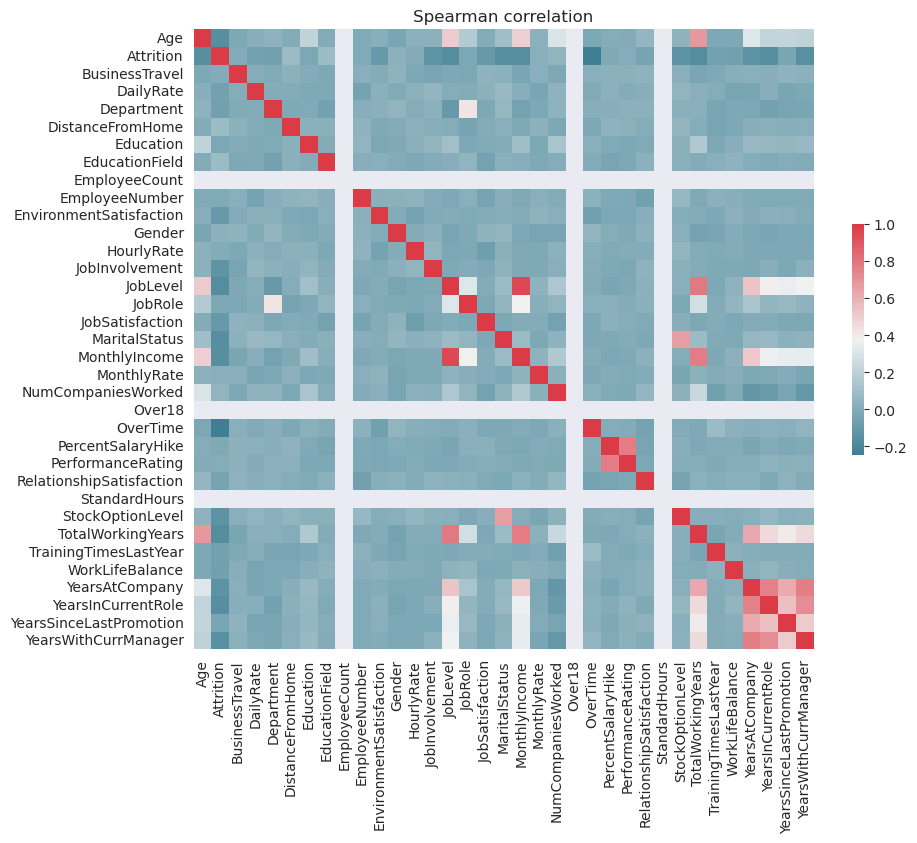

In [36]:
pearson_corr = df2.corr()
spearman_corr = df2.corr(method="spearman")

# fig, ax = plt.subplots(figsize=(10, 10))                   # Sample figsize in inches

# cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map
# sns.heatmap(data      = pearson_corr, 
#             cmap      = cmap, 
#             square    = True, 
#             cbar_kws  = {'shrink': .3}, 
#             annot     = False, 
#             annot_kws = {'fontsize': 11},
#             ax        = ax
#            )
# plt.title("Pearson correlation")
# plt.show()

fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data      = pearson_corr, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = False, 
            annot_kws = {'fontsize': 11},
            ax        = ax
           )
plt.title("Spearman correlation")

### Feature removal

We will drop these columns since they have no variance: employeeCount, over18, standard hours, along with the rate columns since the data in them makes little sense compared to the MonthlyIncome stat. 
(They show no correlation to the other columns, not sure what these columns are supposed to be.)

After looking at the correlation heatmaps, we can view the correlation between many cols that are a factor of time spent at the company. 

In [179]:
df3 = df2.drop(columns=["EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate", "Over18", "StandardHours"])

### Strongly correlated columns

Let's check which of these columns are strongly correlated, this will provide insights when we conduct more feature removal later.

In [181]:
strong_corr = .7

corr_values = set()
corr_cols = set()
for col in spearman_corr:
    for k,v in spearman_corr[col].items():
        if strong_corr < v < 1:
            corr_values.add((col, k, v))
            corr_cols.add(col)
            corr_cols.add(k)
print(corr_values)
print("\nCorrelated cols:")
list(corr_cols)

{('YearsAtCompany', 'YearsInCurrentRole', 0.8539995332892505), ('StockOptionLevel', 'MaritalStatus', 0.7422242936499528), ('YearsAtCompany', 'YearsWithCurrManager', 0.8428033421828458), ('TotalWorkingYears', 'JobLevel', 0.7346775906318871), ('YearsWithCurrManager', 'YearsAtCompany', 0.8428033421828458), ('YearsInCurrentRole', 'YearsWithCurrManager', 0.7247542192761358), ('TotalWorkingYears', 'MonthlyIncome', 0.7100243140565019), ('MaritalStatus', 'StockOptionLevel', 0.7422242936499528), ('JobLevel', 'MonthlyIncome', 0.9204286748392109), ('YearsWithCurrManager', 'YearsInCurrentRole', 0.7247542192761358), ('MonthlyIncome', 'JobLevel', 0.9204286748392109), ('JobLevel', 'TotalWorkingYears', 0.7346775906318871), ('YearsInCurrentRole', 'YearsAtCompany', 0.8539995332892505), ('MonthlyIncome', 'TotalWorkingYears', 0.7100243140565019)}

Correlated cols:


['YearsWithCurrManager',
 'YearsAtCompany',
 'TotalWorkingYears',
 'MonthlyIncome',
 'StockOptionLevel',
 'JobLevel',
 'YearsInCurrentRole',
 'MaritalStatus']

### Visualization of histograms and violinplots

These visualizations allow us to get a better understanding of the values and distribution of our data. 

Since there are so many columns in our data, it doesn't make since to print all these graphs out here. They are all being saved off locally in there respective folders. 

We will examine a couple graphs of interest that emphasize different aspects of the columns that may be useful later.

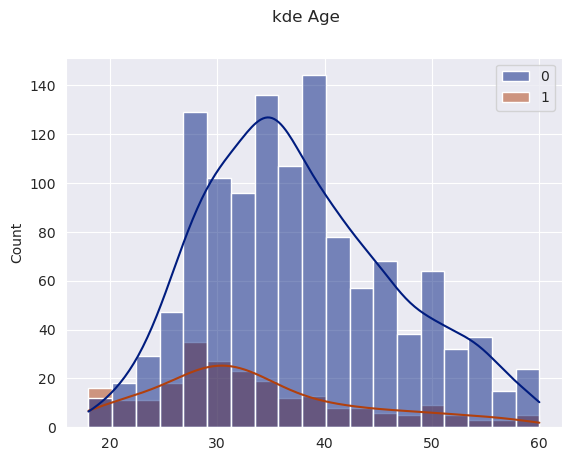

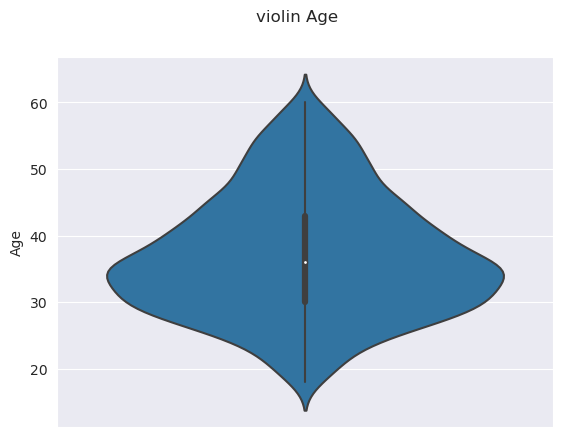

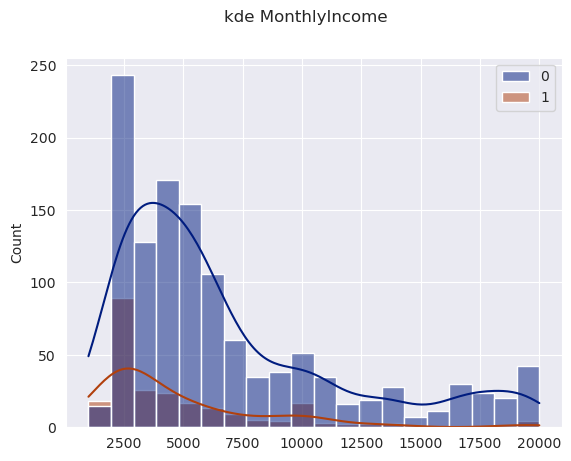

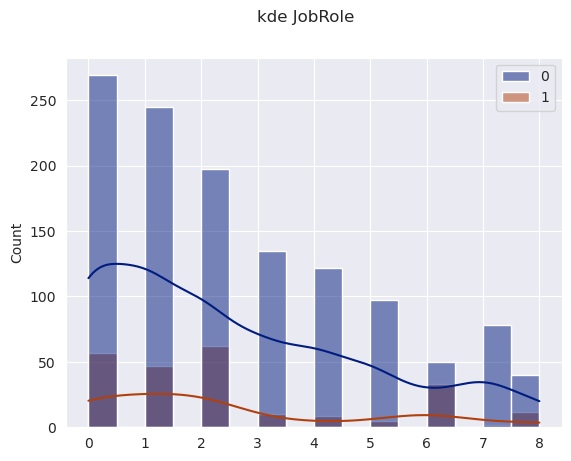

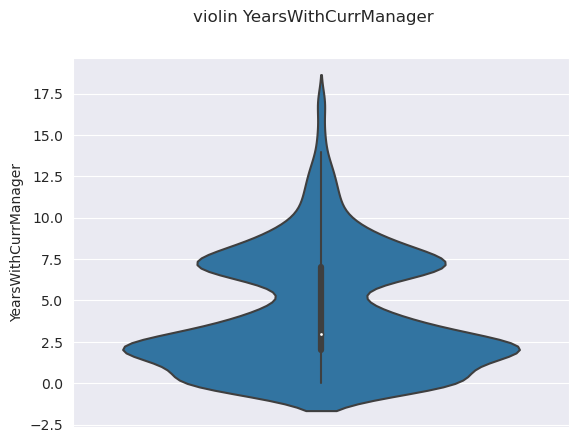

In [186]:
df3 = pd.DataFrame(df3.to_dict())

for col in df3.columns:

    plt.clf()
    plt.cla()
    sns.histplot(x=df3[col].values, kde=True, palette="dark", hue=df3["Attrition"].values)
    # sns.histplot(x=df3[col].value_counts(), kde=True, palette="dark")
    plt.suptitle(f"kde {col}")
    
    plt.savefig(f"kde_images/kde_{col}.png", bbox_inches="tight")
    plt.clf()
    plt.cla()
    sns.violinplot(y=df3[col].astype("float"))
    plt.suptitle(f"violin {col}")
    plt.savefig(f"violinplots/violin_{col}.png", bbox_inches="tight")

# df2.dtypes


# print("Here are some example graphs that are interesting, since there are 70 can't show all of them")
display(Image("kde_images/kde_Age.png"))
display(Image("violinplots/violin_Age.png"))
display(Image("kde_images/kde_MonthlyIncome.png"))
Image("kde_images/kde_JobRole.png")

### Standout visualization results

1. Age: Note the different in the distribution between the employees that quit (labeled 1). You can view that the first bar of the histogram has a larger amount of attrition than not, which is quite an outliar. 

2. This trend is also followed by MontlyIncome, which makes some sense that they are correlated. You can see the larger proportion of attrition in the lowest pay range

3. Job Role outliar roles. Look at the huge variance in attrition based on the role. The proportion of attrition on job 6 is the highest (Research Scientist), while 3,4,5,7 seem to have very low attrition. (manager, managing director, research director, sales executive). Could this be since all these positions are managing, while many of the other positions are more replaceable?

4. The bimodal distribution on the years with curr manager is quite interesting. There are huge spikes at 2.5 years and 7.5 years. Not sure how this will impact the model, but this was unexpected.

### Can we draw any cluster information using pca and our attrition labels?

Let's standard scale our data and use PCA to transform our data into two dimensions so view can view it visually

This won't given us a fully accurate visualization, each dimension has an explained variance value that is essentially how much of the data is explained in that dimension. Therefore in only two dimensions, only so much of the data can be explained and viewed in 2d.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://www.educba.com/scikit-learn-pca/


Explained variance in 2d: [0.17558431 0.07072988]


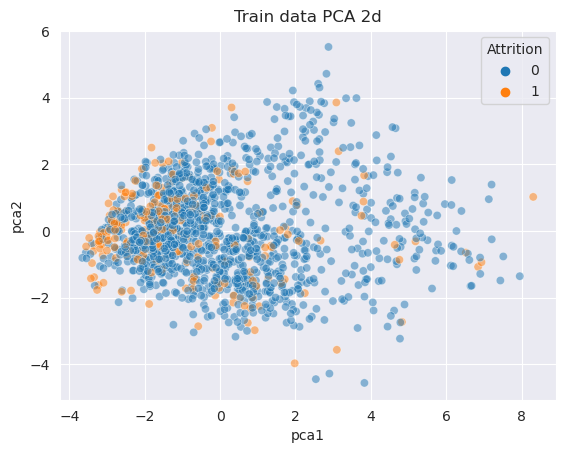

In [209]:
def pca2D_plot(df):

    pca = PCA(n_components=2)

    y = df["Attrition"]
    df = df.drop("Attrition",axis=1)

# we must standardize our data before pca
    scaler = StandardScaler()

    df = scaler.fit_transform(df.values)

    data = pca.fit_transform(df)

    print("Explained variance in 2d:",pca.explained_variance_ratio_)

    pca_data = np.vstack((data.T, y)).T


    pca_df = pd.DataFrame(data=pca_data, columns=("pca1", "pca2", "label"))

    sns.scatterplot(data=pca_df, x="pca1", y="pca2", hue=y, alpha=.5)
    plt.title("Train data PCA 2d")

pca2D_plot(df3)

### Note the labels seem to lack a clearly defined cluster. Why could this be? (This was expected)

First of all, look at the explained variance that our PCA 2d has. Only 17% of the data is explained by pca1, and 6% is explained by pca2. This demonstrates how while pca can produce meaningful insights, it is always important to understand what is actually happening. This demonstrates that we have too many different columns to be able to simple pca them down to 2d and make any meaningful conclusions.

Let's build a classifier that will be able to fit this data to dicern more meaning!

## Hypothesis testing:

What are the most impactful features on predicting employee attrition?

What are the most effective classifiers on predicting employee attrition?

Can we gain any insights from clustering?

#### Train and test

We must create test and train datasets to determine accuracy of different classifiers.

We will try a 85-15 split here, going to visualize the distributions of the indivudal columns and correlation of the columns

Also, ensure that the distributions of the train and test set match for all features. We will do this using groupby on the output column to ensure balanced sample of labels. It is cruical that we have an even balance of our class feature in both datasets.

Also, we will standard scale our train and test data so no features have higher impact due to larger values.

We will use functionality here, so we can easily enter new data back into this to split easily

In [59]:
def custom_test_split(df, seed):
    train = df.groupby('Attrition').sample(frac=0.8, random_state=seed)
    idxs = train.index
    test = df.drop(idxs)

    trainY =train["Attrition"].values
    trainX = train.reset_index().drop(columns=["Attrition", "index"])


    
    cols = trainX.columns
    testY = test["Attrition"].values
    testX = test.reset_index().drop(columns=["Attrition", "index"])

    
    scaler = StandardScaler()

    trainX = scaler.fit_transform(trainX.values)

    testX = scaler.fit_transform(testX.values)

    return trainX, trainY, testX, testY, cols



In [200]:
trainX, trainY, testX, testY, cols = custom_test_split(df3, 12)

train_data = trainX, trainY, testX, testY 

Double check that our class variable distribution matches for train and test:

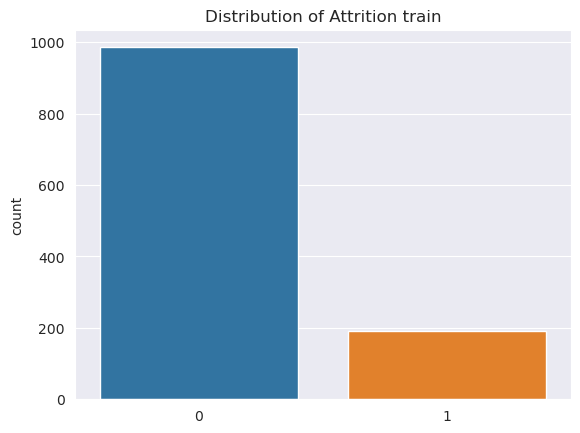

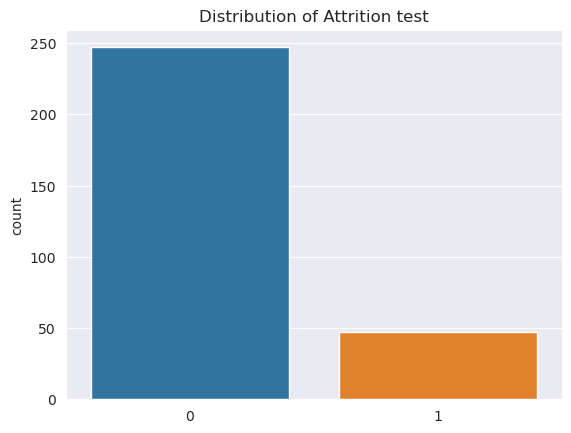

In [102]:
sns.countplot(x=trainY)
plt.title("Distribution of Attrition train")
plt.show()

plt.cla()
plt.clf()
sns.countplot(x=testY)
plt.title("Distribution of Attrition test")
plt.show()


Unfortunately, the classes are not balanced. This might make the classification more difficult. But the distributions are the same. We will continue for now.

### Scikit-learn modeling
Let's get started with some modeling with sklearn. 

To begin, we will compare our results of three different classifiers:

1. DecisionTreeClassifier: Decision tree classifiers are used to predict the value of a target variable by learning simple decision rules inferred from the data features.

    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2. KNeighborsClassifier: Kneighbors classifiers are used to predict the value of a target variable by learning from the values of the target variable in the training data set that are closest to the new data point.

    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

3. RandomForestClassifier: Random forest classifiers are used to predict the value of a target variable by learning a set of decision rules from a randomly selected subset of the training data.

    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


names = [
    "Decision Tree",
    "Nearest Neighbors",
    "Random Forest",

]
classifiers = [DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]


#### Building functionality to fit and score multiple models

Since we are going to be running multiple models with varying params and data, we should make our implementation functional. The main process contains these steps:

1. Fit the model with the training data

2. Cross validate that model with the training data

3. Predict and score based on the test data

4. Save and graph feature importances (If the model determines feature importances)

First, we will call our classifiers with the default params, then we will optimize them after.

In [242]:
def runModels(names, classifiers, trainX, trainY, testX, testY, cols):
    labels_d = {}
    for name, model in zip(names, classifiers):
        model.fit(trainX,trainY)
        cross_val = cross_val_score(model, trainX, trainY)
        labels_d[name] = model.predict(testX)
        score = model.score(testX, testY)
        print(name, "Accuracy:", score)
        print("Cross val score:", cross_val)


        # if there's no feature importance don't bother graphing
        try:
            # congesting output, unccoment these to view the importances dicts
            # print("feature importances")
            # print(dict(zip(cols, model.feature_importances_)))
            # print(len(model.feature_importances_))
            plt.clf()
            plt.cla()
            sns.barplot(y=cols, x= model.feature_importances_)
            plt.title(f"Feature Importance output from {name}")
            plt.show()

        except Exception as e:
            print(e)
            print()

    return labels_d


Call the function with the classifiers and our train and test splits. The cols variable is used for labeling the feature importances.

### Output of different classifiers

Every classifier ran through this function will print out it's accuracy (high accuracy doesn't denote that our model is working well), cross validation accuracy values, and feature importance values and barplot.

We will compare the results of these different models, learning from which features are most relevant to a decsion. (There are no feature importances for KNeighbors)

DecisionTreeClassifier() Accuracy: 0.7482993197278912
Cross val score: [0.72457627 0.77021277 0.81276596 0.74893617 0.70638298]


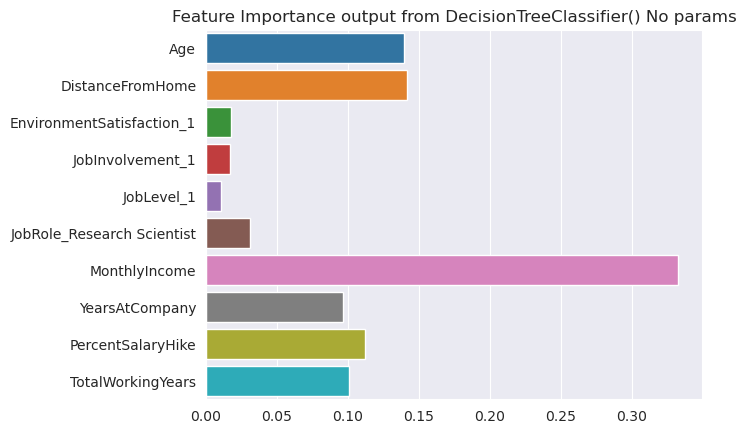

KNeighborsClassifier() Accuracy: 0.826530612244898
Cross val score: [0.83898305 0.79148936 0.85106383 0.80851064 0.83404255]
'KNeighborsClassifier' object has no attribute 'feature_importances_'

RandomForestClassifier() Accuracy: 0.8435374149659864
Cross val score: [0.83050847 0.82553191 0.85106383 0.82978723 0.85106383]


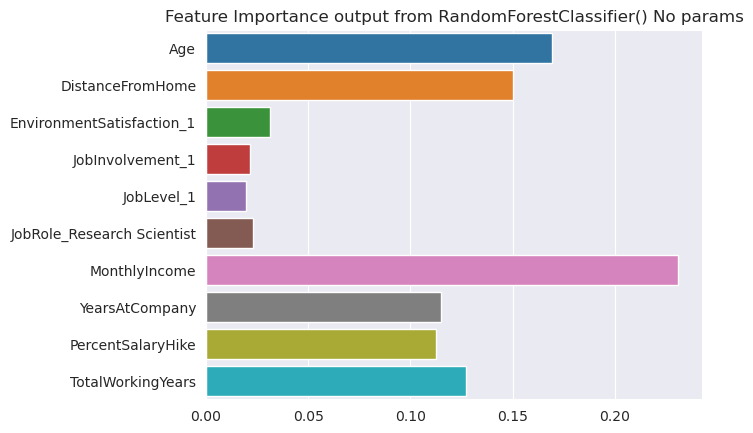

In [233]:
labels_d = runModels(names, classifiers, *train_data, cols)

#### Discussing Accuracy and feature outputs

Kneighbors had the best accuracy with 86.39%, RandomForest: 85.37%, DecisionTree: 80.61%

Let's try to find the best paramaters to use with these classifiers. One very effective way to determine these hyperparamters is GridSearch. GridSearch is a powerful tool that allows us to systematically search for the best hyperparameter values for our models. It exhaustively tries every combination of hyperparameter values and reports the performance of each model so that we can select the best one. This can save us a lot of time and effort compared to manually trying different values ourselves.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

We will build functionality to gridSearch on each of our models dynamically below:

In [65]:
def gridSearch(model, params):
    grid = GridSearchCV(model, params, scoring='accuracy', verbose=1)
    grid.fit(trainX, trainY)
    # print(grid.best_params_)
    print(grid.best_score_)
    return grid.best_estimator_

Building the param dictionary of different hyperparamters to pass and fit for best results for DecisionTree

In [203]:
model = classifiers[0]

params = {"criterion":["gini", "entropy", "log_loss"],
    "max_depth":[50, 60, 70, 75, 80, 100,500,1000, None], 
    "min_samples_split":[2,3,4]}

dec_params = gridSearch(model, params)
dec_params


Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.8052902993148214


DecisionTreeClassifier(criterion='log_loss', max_depth=500, min_samples_split=4)

Building the param dictionary of different hyperparamters to pass and fit for best results for KNeighbors

In [204]:
model = classifiers[1]

params = {"n_neighbors":[2,3,4,5,6,7,10], 
'weights':['uniform', 'distance'],
"leaf_size":[20,30,40],
"algorithm":["auto", "ball_tree", "kd_tree", "brute"], 
'metric':['euclidean', 'manhattan']}

knn_params = gridSearch(model, params)
knn_params

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
0.8545979084024522


KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=10,
                     weights='distance')

Building the param dictionary of different hyperparamters to pass and fit for best results for RandomForest

In [205]:
model = classifiers[2]

params = {"n_estimators":[10,90, 100, 150],
    "criterion":["gini", "entropy"],
    "max_depth":[100, 1000, 2000, None],
    "min_samples_split":[2,3,4], 
    "random_state":[100],
    
    }

rdm_forest_params = gridSearch(model, params)
rdm_forest_params

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0.867353047241255


RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=3,
                       n_estimators=150, random_state=100)

### Run models again, with best fit estimators

Let's view our accuracy and feature importance again, now with the best estimators.

What differences are we looking for in these results? Changes in accuracy, significant changes in feature importances.

DecisionTreeClassifier(criterion='log_loss', max_depth=500, min_samples_split=4) Accuracy: 0.7925170068027211
Cross val score: [0.77966102 0.79148936 0.81702128 0.80425532 0.80425532]


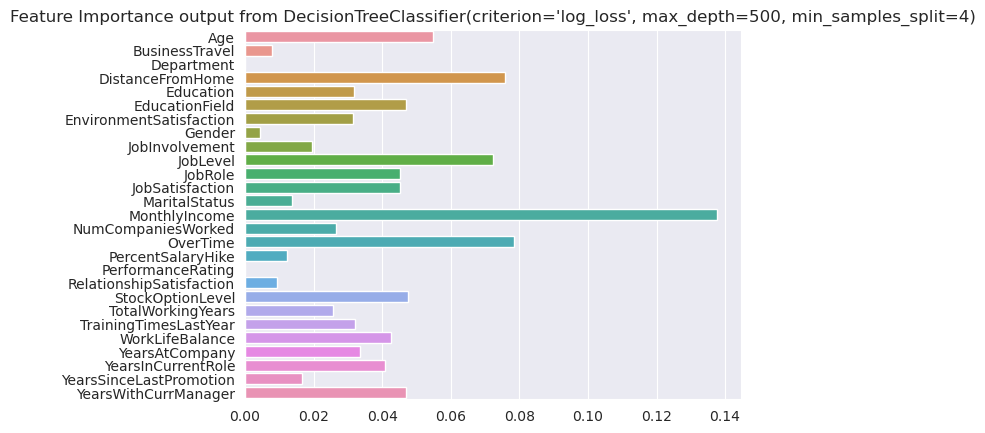

KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=10,
                     weights='distance') Accuracy: 0.8503401360544217
Cross val score: [0.84745763 0.86382979 0.86382979 0.83829787 0.85957447]
'KNeighborsClassifier' object has no attribute 'feature_importances_'

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=3,
                       n_estimators=150, random_state=100) Accuracy: 0.8605442176870748
Cross val score: [0.86016949 0.86808511 0.87234043 0.86808511 0.86808511]


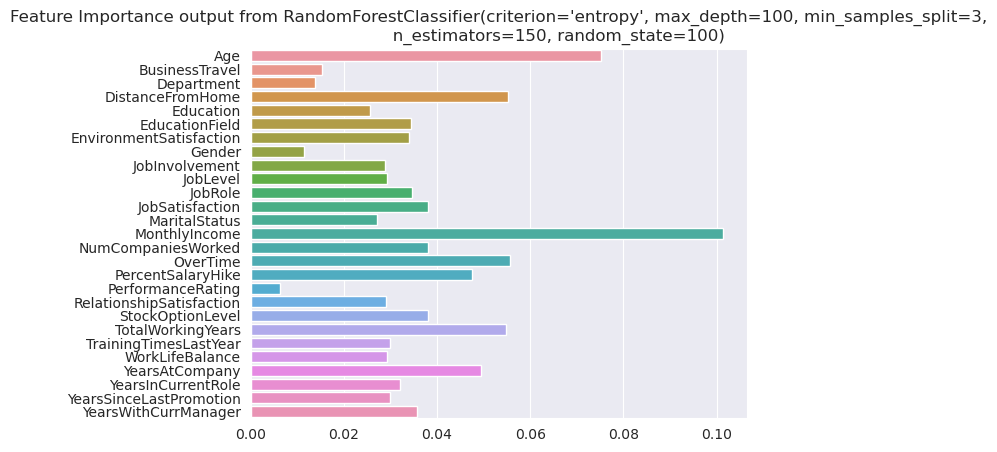

In [206]:
best_estimators = [dec_params, knn_params, rdm_forest_params]

labels_d = runModels(names, best_estimators, *train_data, cols)

#### Interpretation

The decision tree feature importances for the GridSearch resulted in removing the features of department and performancerating completely from the output class. This is very interesting, considering that both those variables are also low on the randomforest. 

Remember to consider, that GridSearch simply tunes based on optimal hyperparamater fit for best accuracy, which may not always be ideal when we are more focused on the recall rate for true positives. We must be careful to examine importance while considering our true positives.

Since these accuracy scores seem higher than they should be, we should look into the matrix of true negatives and true positives to get a better understanding on how well we are predicting true positves (attrition). We can easily visualize this with a confusion matrix:


### Plotting confusion matrix

A confusion matrix is used to evaluate the performance of a classification model by displaying four cells, each of which represents the number of predictions that were made by the model in each of the four possible categories. The categories are true positives, false positives, true negatives, and false negatives. We can use these categories to calculate a number of different metrics, such as accuracy, precision, recall, and specificity. Note: we care most about recall here, but precision is also valuable.

Accuracy:  the ratio of the number of correct predictions to the total number of predictions
Precision: the ratio of the true positives to the total number of predicted positives
Recall: the ratio of the true positives to the total number of actual positives

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

First, make a function that will allow us to make a function to easily plot a confusion matrix:

In [246]:

def plot_matrix(labels_d, testY):
    # cmap = sns.diverging_palette( 10, 220 , as_cmap = True ) 
    cmap = sns.cubehelix_palette(reverse=True)

    for name, labels in labels_d.items():
        print(name)
        matrix = confusion_matrix(testY, labels)
        
        plt.cla()
        plt.clf()
        sns.heatmap(matrix, annot=True,  cmap='Greens', fmt='g')
        plt.title(f"Confusion Matrix for {name}")
        plt.xlabel("Predicted label")
        plt.ylabel("Acutal label")
        plt.show()
        print(classification_report(testY, labels))
 

Decision Tree


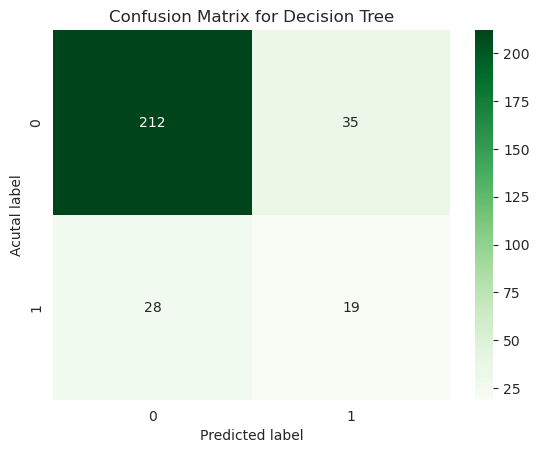

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       247
           1       0.35      0.40      0.38        47

    accuracy                           0.79       294
   macro avg       0.62      0.63      0.62       294
weighted avg       0.80      0.79      0.79       294

Nearest Neighbors


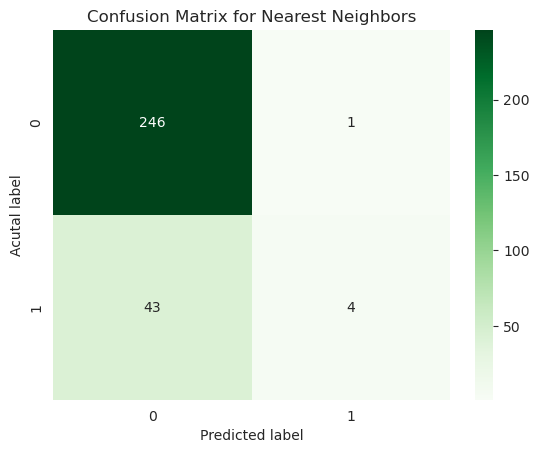

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.80      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.83      0.54      0.54       294
weighted avg       0.84      0.85      0.80       294

Random Forest


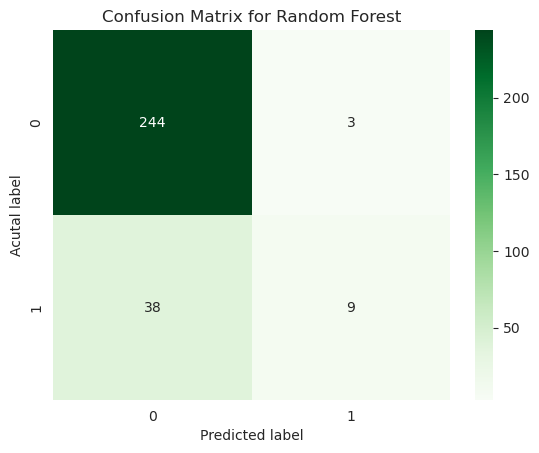

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.75      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.81      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



In [71]:
plot_matrix(labels_d, testY)

### Confusion matrix conclusions:

We are very accurate at predicting the true negatives (0), but very poor at predicting the true positives (1). This is why we have accuracy scores that are high, yet our recall scores for the true positives are very low.

We must look at more metrics than simply accuracy, especially when our main focus is our ability to predict employees before they leave. Even though DecisionTree had the lowest accuracy, it is significantly better at classifying attrition than both other models.

The other classifiers have very high recall for true negatives, but poor true positive recall.

### Can we improve our recall score by removing features? 

We will remove columns that are of minimal importance, and utlize one hot encoding in order to isolate categorical values of high importance (some we identified earlier with our data visualization). 

One hot encoding results in data in the form of a binary matrix, where each column is representing a different category. The number of columns is equal to the number of categories. In the case of a two-category variable, the matrix would look like this:

        Category 1: [1,0,0]
        Category 2: [0,1,0]
        Category 3: [0,0,1]

Each row would then represent a different observation, and the value in each column would indicate the category for that observation. 

(This process is sometimes also called dummy coding, pandas uses pandas.get_dummies() to do this for us https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f


In [210]:
categorical2 = categorical[1:] + ["Education", "JobInvolvement", 'JobSatisfaction', "JobLevel",  "EnvironmentSatisfaction"]
print(categorical2)

one_hot_encode = pd.get_dummies(df.convert_dtypes(), columns=categorical2)
one_hot_encode["Attrition"] = one_hot_encode["Attrition"].map(lambda x: 1 if x == "Yes" else 0)
df3 = one_hot_encode

# retried with one hot encoding, no improvement in results

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Education', 'JobInvolvement', 'JobSatisfaction', 'JobLevel', 'EnvironmentSatisfaction']


We saw earlier that the JobRole_6 of Research Scientist had a very high ratio of attrition. let's use that one hot encoded col in our model. 

In [214]:
# double check this attrition ratio, ensure it is ResearchScientist
print(df2[df2["Attrition"] ==1]["JobRole"].value_counts() /df2["JobRole"].value_counts())

# our second row contained a reserach scientist, lets doublecheck it is encoded correctly
one_hot_encode["JobRole_Research Scientist"].head(2)

0    0.174847
1    0.160959
2    0.239382
3    0.068966
4    0.068702
5    0.049020
6    0.397590
7    0.025000
8    0.230769
Name: JobRole, dtype: float64


0    0
1    1
Name: JobRole_Research Scientist, dtype: uint8

Are there any other variables of high importance we should be concerned with?

Pulled these importances from our classifier output above

In [216]:
importances = {'Age': 0.05253219860420136, 'DailyRate': 0.03891902583303106, 'DistanceFromHome': 0.03529534714938104, 'EmployeeCount': 0.0, 'EmployeeNumber': 0.035348104099301315, 'HourlyRate': 0.03196724115296121, 'MonthlyIncome': 0.056934925805582334, 'MonthlyRate': 0.03616319286829662, 'NumCompaniesWorked': 0.02472683384804263, 'PercentSalaryHike': 0.025637439685277576, 'PerformanceRating': 0.0025302783543212754, 'RelationshipSatisfaction': 0.01799869301850895, 'StandardHours': 0.0, 'StockOptionLevel': 0.022053031148967044, 'TotalWorkingYears': 0.04524390576466363, 'TrainingTimesLastYear': 0.018595887498015426, 'WorkLifeBalance': 0.020695052295919517, 'YearsAtCompany': 0.037414251626051, 'YearsInCurrentRole': 0.02340485434960756, 'YearsSinceLastPromotion': 0.019646474375681632, 'YearsWithCurrManager': 0.02334830459837692, 'BusinessTravel_Non-Travel': 0.00399550407272585, 'BusinessTravel_Travel_Frequently': 0.011748587105152215, 'BusinessTravel_Travel_Rarely': 0.0059900986346920005, 'Department_Human Resources': 0.0014716568483046045, 'Department_Research & Development': 0.0057477727102615, 'Department_Sales': 0.006977903272288765, 'EducationField_Human Resources': 0.0016503183487846173, 'EducationField_Life Sciences': 0.005745800107660811, 'EducationField_Marketing': 0.004034285413959902, 'EducationField_Medical': 0.006389623153355859, 'EducationField_Other': 0.0029507730271832, 'EducationField_Technical Degree': 0.007300683779447715, 'Gender_Female': 0.005299729099906867, 'Gender_Male': 0.00563454036082922, 'JobRole_Healthcare Representative': 0.0025070752588890167, 'JobRole_Human Resources': 0.0020712451111397365, 'JobRole_Laboratory Technician': 0.0066420697061620355, 'JobRole_Manager': 0.0014658920554786925, 'JobRole_Manufacturing Director': 0.0023454528329543292, 'JobRole_Research Director': 0.0006934573136898443, 'JobRole_Research Scientist': 0.004852354782163085, 'JobRole_Sales Executive': 0.00586726490690066, 'JobRole_Sales Representative': 0.007784834785289319, 'MaritalStatus_Divorced': 0.004568514543423841, 'MaritalStatus_Married': 0.006947620451862761, 'MaritalStatus_Single': 0.020216478358875647, 'Over18_Y': 0.0, 'OverTime_No': 0.03346743587710544, 'OverTime_Yes': 0.028877855957050738, 'Education_1': 0.004836278817408611, 'Education_2': 0.004859280413256406, 'Education_3': 0.0046760715061028016, 'Education_4': 0.004663723960434923, 'Education_5': 0.0016955290726010193, 'JobInvolvement_1': 0.005838205745765439, 'JobInvolvement_2': 0.0054526559243744475, 'JobInvolvement_3': 0.005636838666730268, 'JobInvolvement_4': 0.0021851746878237778, 'JobSatisfaction_1': 0.008164726838552152, 'JobSatisfaction_2': 0.004561656499519103, 'JobSatisfaction_3': 0.005440280651411881, 'JobSatisfaction_4': 0.007135826279748908, 'JobLevel_1': 0.014368850129110211, 'JobLevel_2': 0.005418678387424605, 'JobLevel_3': 0.003909113199959068, 'JobLevel_4': 0.0009813365060530404, 'JobLevel_5': 0.0005962159661386555, 'EnvironmentSatisfaction_1': 0.009133515957758343, 'EnvironmentSatisfaction_2': 0.004957709863793867, 'EnvironmentSatisfaction_3': 0.004901931774618042, 'EnvironmentSatisfaction_4': 0.005605708870832555}
sorted(importances.items(), key=lambda x:x[1], reverse=True)[:10]

[('MonthlyIncome', 0.056934925805582334),
 ('Age', 0.05253219860420136),
 ('TotalWorkingYears', 0.04524390576466363),
 ('DailyRate', 0.03891902583303106),
 ('YearsAtCompany', 0.037414251626051),
 ('MonthlyRate', 0.03616319286829662),
 ('EmployeeNumber', 0.035348104099301315),
 ('DistanceFromHome', 0.03529534714938104),
 ('OverTime_No', 0.03346743587710544),
 ('HourlyRate', 0.03196724115296121)]

Building a reduced dataset with these select columns I subjectively believe are "most important"

In [144]:
df4 = one_hot_encode[['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction_1',
       'JobInvolvement_1', 'JobLevel_1', 'JobRole_Research Scientist',
        'MonthlyIncome', "YearsAtCompany",
       'PercentSalaryHike', "TotalWorkingYears"]]

df4.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction_1,JobInvolvement_1,JobLevel_1,JobRole_Research Scientist,MonthlyIncome,YearsAtCompany,PercentSalaryHike,TotalWorkingYears
0,41,1,1,0,0,0,0,5993,6,11,8
1,49,0,8,0,0,0,1,5130,10,23,10
2,37,1,2,0,0,1,0,2090,0,15,7
3,33,0,3,0,0,1,1,2909,8,11,8
4,27,0,2,1,0,1,0,3468,2,12,6


#### Using Kolmogorov-Smirnov 2 sample test to determine equal distribution of cols in train and test

The Kolmogorov-Smirnov 2 sample test is a useful tool for assessing whether two samples (our train and test data) come from the same distribution. The test is based on the maximum difference between the cumulative distribution functions of the two samples. If the two samples come from the same distribution, the maximum difference will be small. If the two samples come from different distributions, the maximum difference will be large. The p-values of this sample will denote if there is significant differences in the distributions if it falls below the alpha level.

Assuming an alpha value of .05, we will reject the null hypothesis that they come from the same distribution for any p-value below .05. Any p-value greater than .05 leads us to fail to reject this null hypothesis. (Same distribution)

In [217]:
train = df4.groupby('Attrition').sample(frac=0.8, random_state=12)
idxs = train.index
test = df4.drop(idxs)

In [218]:
def ks2(train, test):
    results = {}
    for col in train.columns:
        out = stats.ks_2samp(train[col], test[col])
        # we can focus on the p-value for now, ignore the test statistic output
        results[col] = out[1]

    results = sorted(results.items(), key=lambda x:x[1], reverse=False)
    # print("lowest 5 p-values: ", results[:5])
    return results

ks2(train, test)[:5]

[('MonthlyIncome', 0.073693521890829),
 ('Age', 0.13110315737125922),
 ('DistanceFromHome', 0.3333085808903721),
 ('YearsAtCompany', 0.42087778241449847),
 ('TotalWorkingYears', 0.6499319474313332)]

While most of our features are well above the alpha value, there appears to be one column that is very close to the alpha value...

Considering that MonthlyIncome is such a important feature for our model, we should examine these distributions: 

Text(0.5, 1.0, 'Distributions of Train and Test data MonthlyIncome')

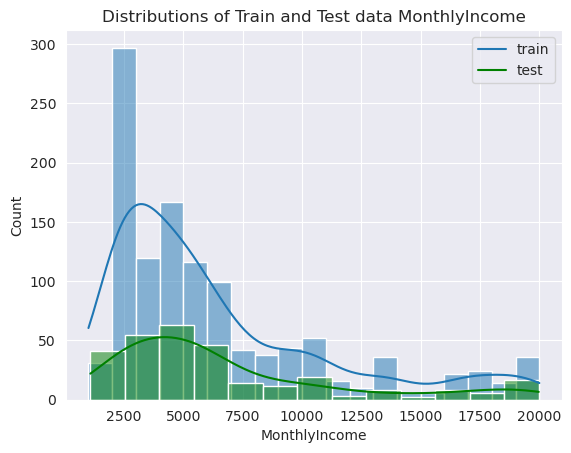

In [219]:
train = pd.DataFrame(train.to_dict())
test = pd.DataFrame(test.to_dict())

sns.histplot(x=train["MonthlyIncome"], kde=True)
sns.histplot(x=test["MonthlyIncome"], kde=True, color="green", legend=True)
plt.legend(labels=["train", "test"])
plt.title("Distributions of Train and Test data MonthlyIncome")

Now, let's try a different random state, and compare the ks 2 sample results and ensure that our Percent Hourly Hike col has a more similar distribution in the data

[('MonthlyIncome', 0.693866012931167), ('TotalWorkingYears', 0.693866012931167), ('PercentSalaryHike', 0.819149841518782), ('Age', 0.8381009272686794), ('DistanceFromHome', 0.9434326003123342)]


Text(0.5, 1.0, 'Distributions of Train and Test data MontlyIncome')

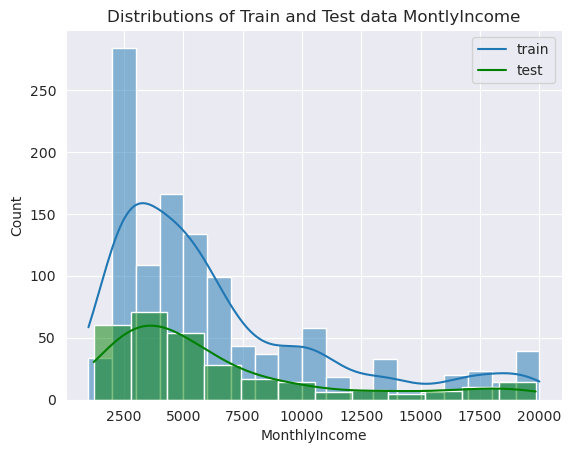

In [148]:
train = df4.groupby('Attrition').sample(frac=0.8, random_state=8)
idxs = train.index
test = df4.drop(idxs)

print(ks2(train, test)[:5])

train = pd.DataFrame(train.to_dict())
test = pd.DataFrame(test.to_dict())

sns.histplot(x=train["MonthlyIncome"], kde=True)
sns.histplot(x=test["MonthlyIncome"], kde=True, color="green", legend=True)
plt.legend(labels=["train", "test"])
plt.title("Distributions of Train and Test data MontlyIncome")

This distribution looks like a much better representation. Note even our lowest p-values are much higher with this random state. We should continue using 8 for this.

### Re-train model with feature removed data

Following some of the same steps as before, let's hope for better results here.

Main goal of this is to determine more accurate and meaningful feature importances, which will help us better answer our hypothesis from earlier.

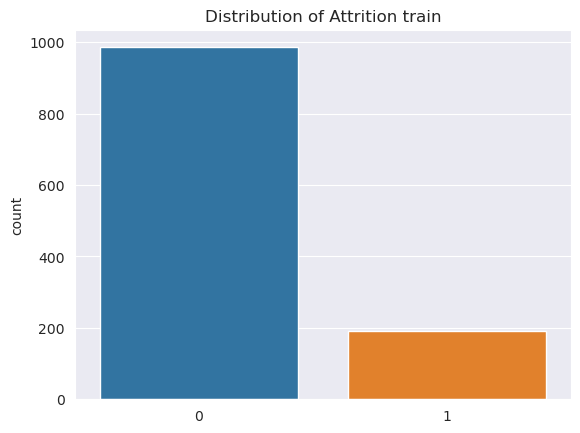

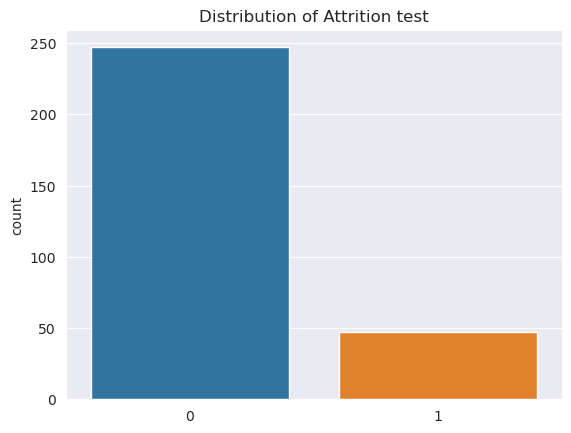

In [220]:
trainX, trainY, testX, testY, cols = custom_test_split(df4,8)

train_data = trainX, trainY, testX, testY

sns.countplot(x=trainY)
plt.title("Distribution of Attrition train")
plt.show()

plt.cla()
plt.clf()
sns.countplot(x=testY)
plt.title("Distribution of Attrition test")
plt.show()


DecisionTreeClassifier(criterion='log_loss', max_depth=500, min_samples_split=4) Accuracy: 0.7551020408163265
Cross val score: [0.78389831 0.76170213 0.79574468 0.75744681 0.76595745]


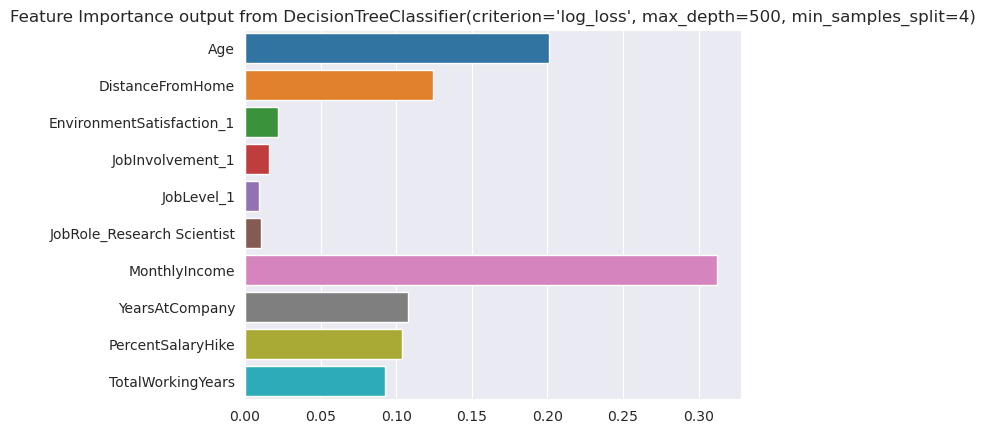

KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=10,
                     weights='distance') Accuracy: 0.8299319727891157
Cross val score: [0.82627119 0.79574468 0.85531915 0.82978723 0.8212766 ]
'KNeighborsClassifier' object has no attribute 'feature_importances_'

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=3,
                       n_estimators=150, random_state=100) Accuracy: 0.8401360544217688
Cross val score: [0.83050847 0.84255319 0.86382979 0.82978723 0.84680851]


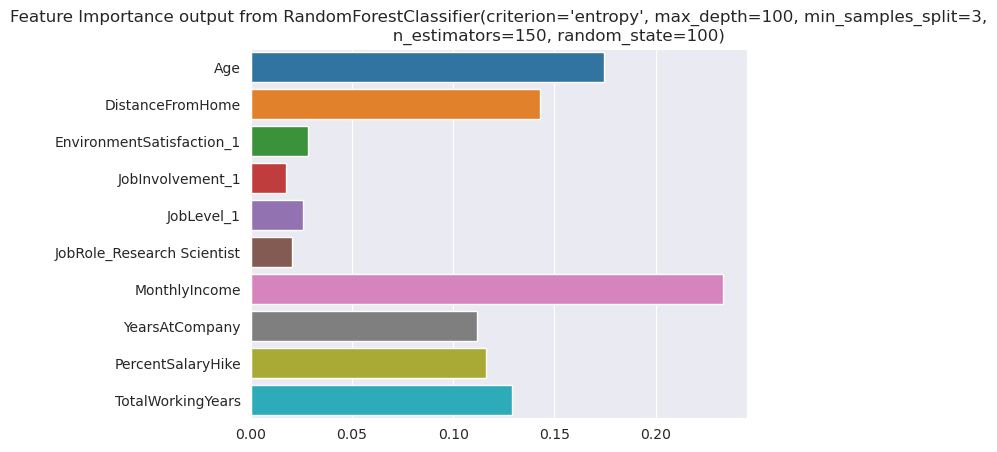

In [221]:
labels_d = runModels(names, best_estimators, *train_data, cols)

Decision Tree


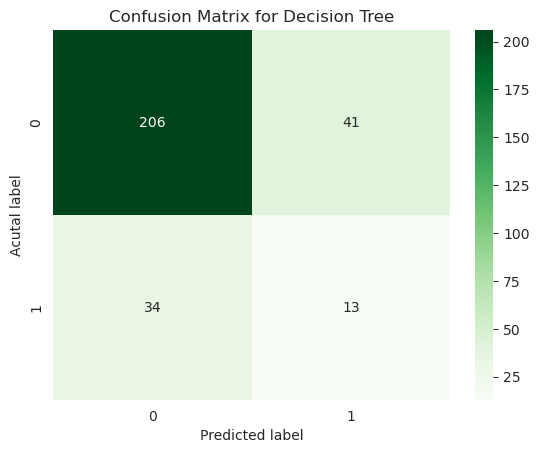

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       247
           1       0.24      0.28      0.26        47

    accuracy                           0.74       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.76      0.74      0.75       294

Nearest Neighbors


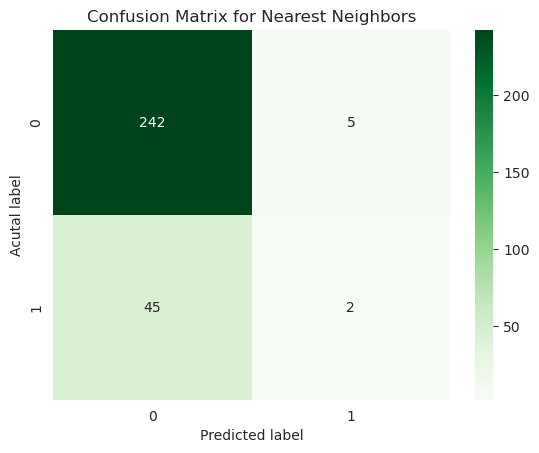

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       247
           1       0.29      0.04      0.07        47

    accuracy                           0.83       294
   macro avg       0.56      0.51      0.49       294
weighted avg       0.75      0.83      0.77       294

Random Forest


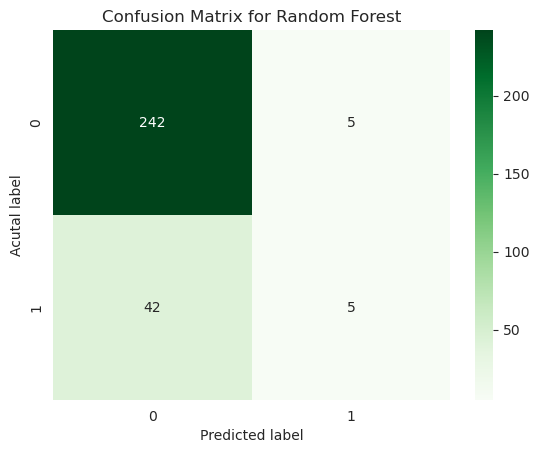

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.68      0.54      0.54       294
weighted avg       0.80      0.84      0.79       294



In [151]:
plot_matrix(labels_d, testY)

### Would making our DecisionTreeClassifier log loss improve our true positives?

The log loss function is a measure of how well a model predicts the probability of an event, while improving the accuracy of a model by penalizing incorrect predictions.

https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

DecisionTreeClassifier(criterion='log_loss', max_depth=100, min_samples_split=3) Accuracy: 0.7517006802721088
Cross val score: [0.77966102 0.77021277 0.79148936 0.75319149 0.76595745]
name 'title_param' is not defined



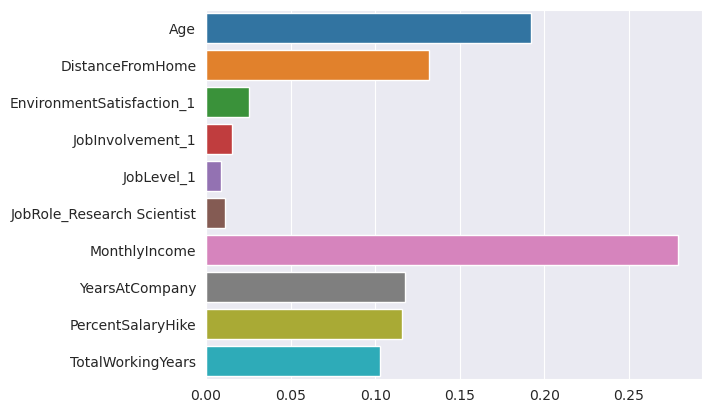

In [236]:
labels_d = runModels(names[0], [DecisionTreeClassifier(criterion='log_loss', max_depth=100, min_samples_split=3)], *train_data, cols)

D


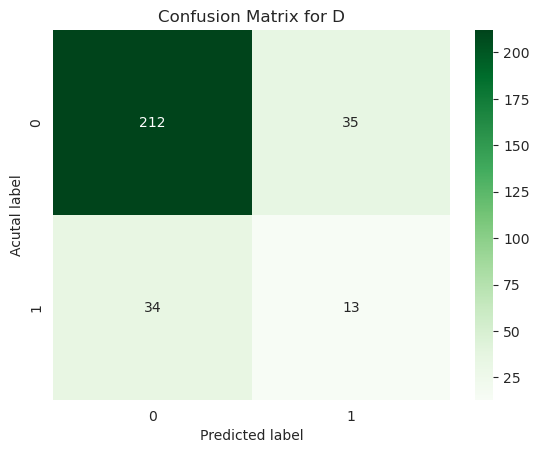

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       247
           1       0.27      0.28      0.27        47

    accuracy                           0.77       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.77      0.77      0.77       294



In [223]:
plot_matrix(labels_d, testY)

Note the feature importances using logloss placed lower importance on total working years and very low importance on reserach scientist, which is suprising.

Small improvement in recall 

We are still struggling with this imbalanced classifcation, our model needs to place higher weight on classifiication of true positives. 

### Let's try XGBoost with imbalanced classification

XGBoost can improve imbalanced classification by using a variety of techniques to handle imbalance in the data. It has a built-in parameter for handling class imbalance, which can be used to automatically adjust weights in the loss function.

We will evaluate this using logloss, which should also improve the recall.

https://machinelearningmastery.com/xgboost-for-imbalanced-classification/


In [154]:
from xgboost import XGBClassifier

df4["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Using weight param 1
XGBClassifier Accuracy: 0.826530612244898
Cross val score: [0.80508475 0.8212766  0.84680851 0.79574468 0.8212766 ]


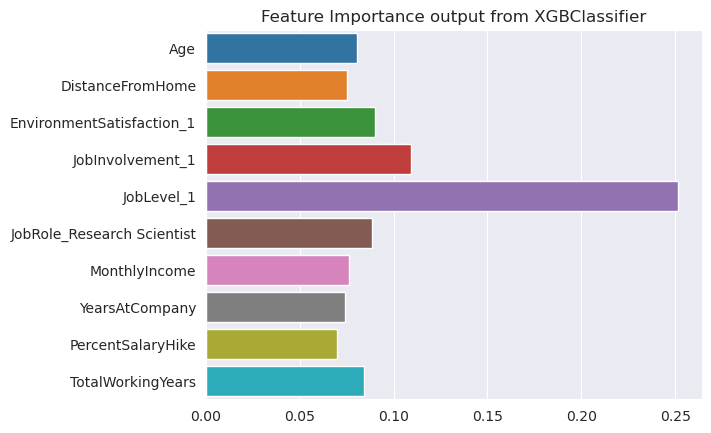

XGBClassifier


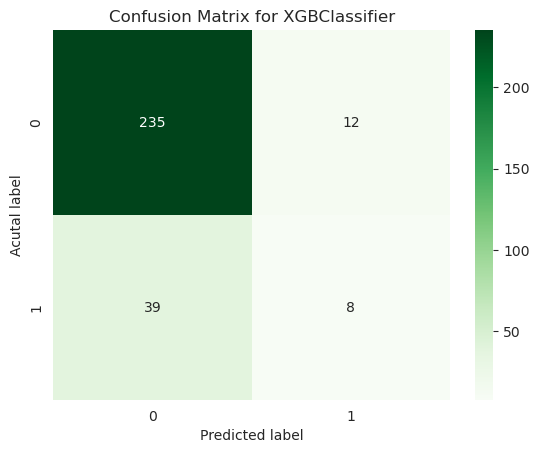

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       247
           1       0.40      0.17      0.24        47

    accuracy                           0.83       294
   macro avg       0.63      0.56      0.57       294
weighted avg       0.78      0.83      0.80       294

Using weight param 0.25
XGBClassifier Accuracy: 0.8401360544217688
Cross val score: [0.84322034 0.8212766  0.85106383 0.81702128 0.82553191]


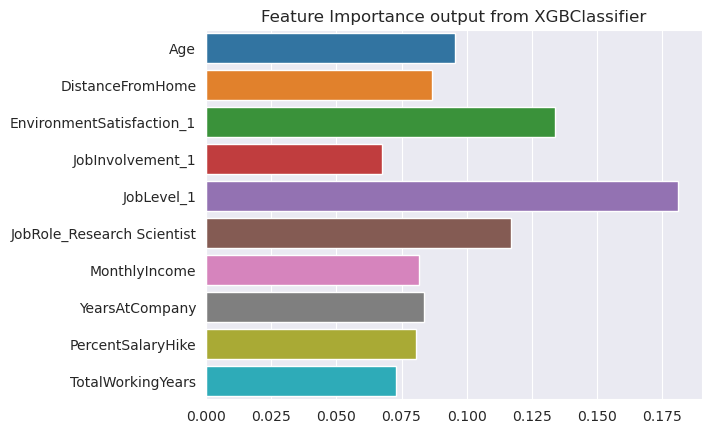

XGBClassifier


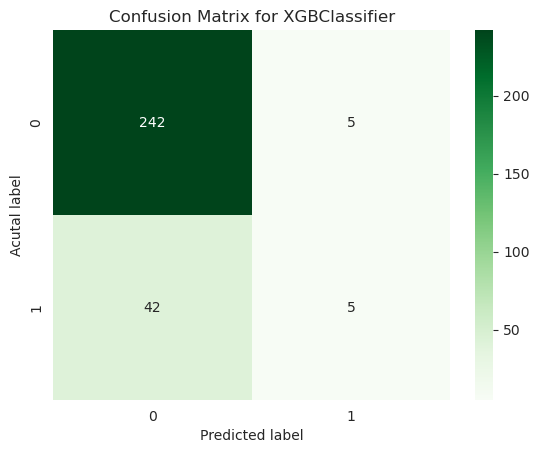

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.68      0.54      0.54       294
weighted avg       0.80      0.84      0.79       294

Using weight param 50
XGBClassifier Accuracy: 0.7653061224489796
Cross val score: [0.75423729 0.77446809 0.78723404 0.77021277 0.77446809]


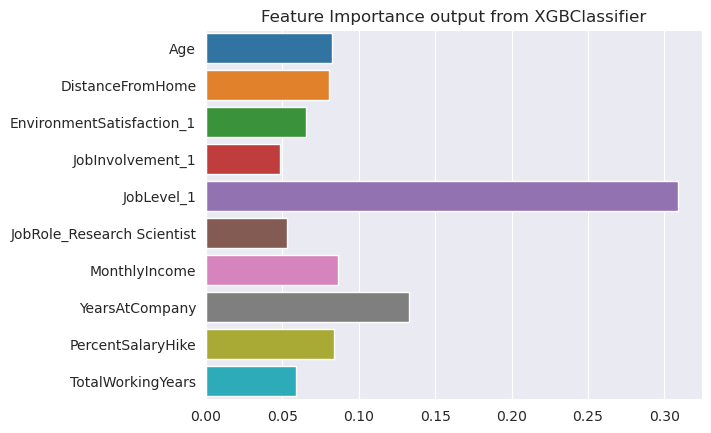

XGBClassifier


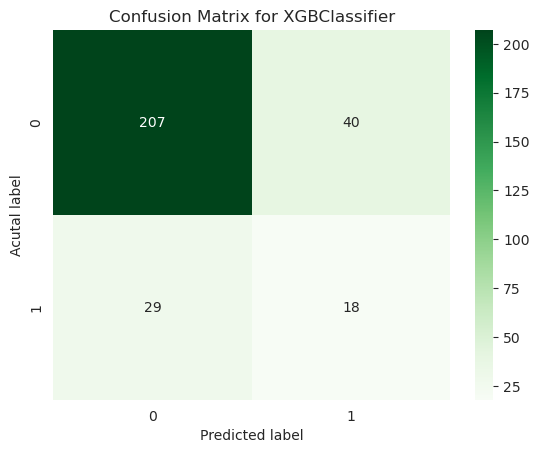

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       247
           1       0.31      0.38      0.34        47

    accuracy                           0.77       294
   macro avg       0.59      0.61      0.60       294
weighted avg       0.79      0.77      0.77       294

Using weight param 200
XGBClassifier Accuracy: 0.7142857142857143
Cross val score: [0.76271186 0.75744681 0.75744681 0.73617021 0.7787234 ]


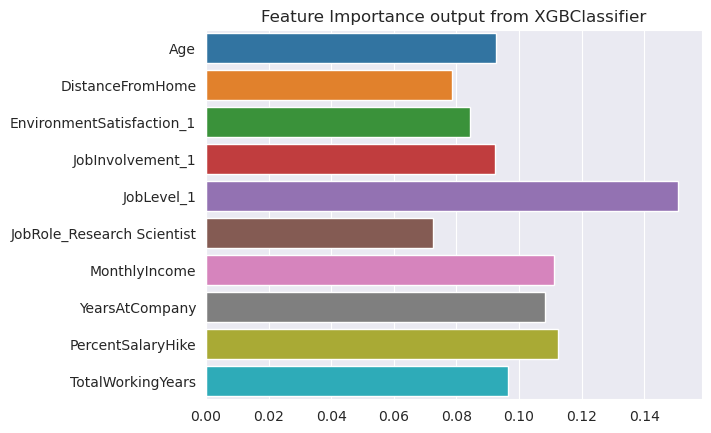

XGBClassifier


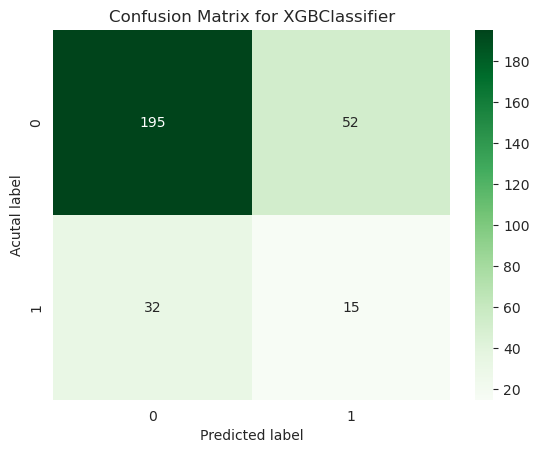

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       247
           1       0.22      0.32      0.26        47

    accuracy                           0.71       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.76      0.71      0.73       294

Using weight param 300
XGBClassifier Accuracy: 0.7346938775510204
Cross val score: [0.70762712 0.75744681 0.73617021 0.71489362 0.74468085]


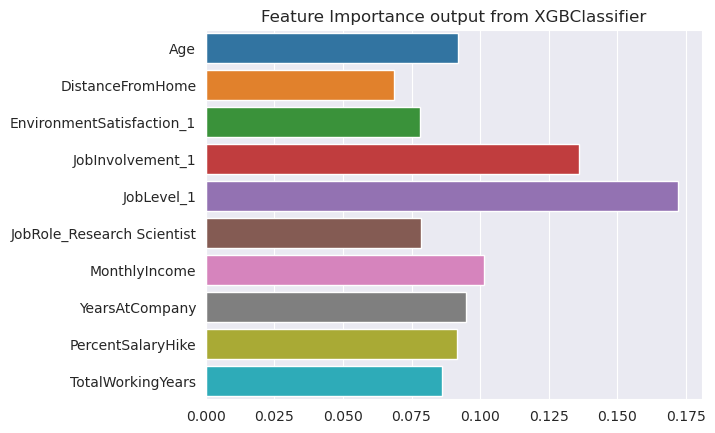

XGBClassifier


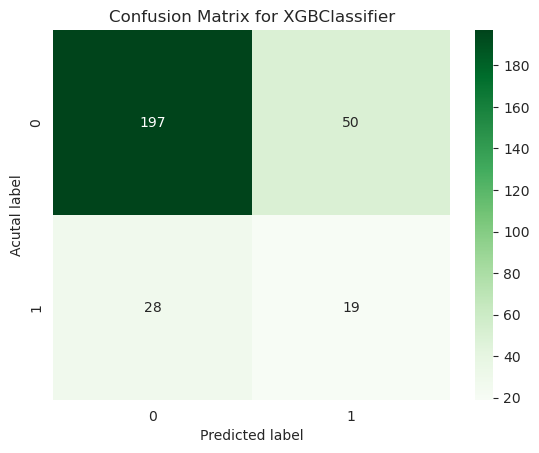

              precision    recall  f1-score   support

           0       0.88      0.80      0.83       247
           1       0.28      0.40      0.33        47

    accuracy                           0.73       294
   macro avg       0.58      0.60      0.58       294
weighted avg       0.78      0.73      0.75       294

Using weight param 1000
XGBClassifier Accuracy: 0.7108843537414966
Cross val score: [0.69067797 0.71914894 0.76170213 0.70212766 0.71489362]


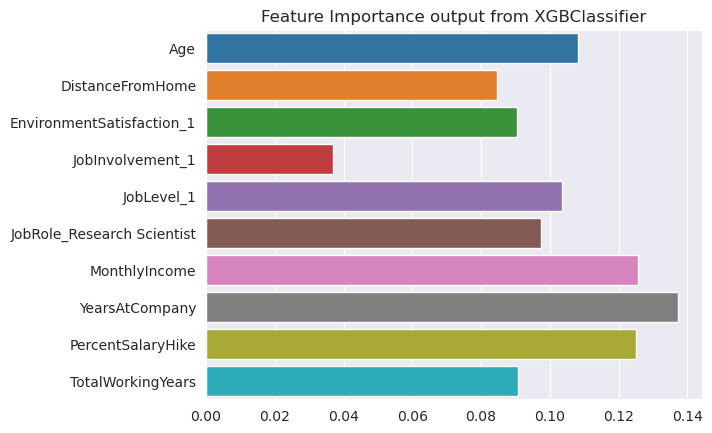

XGBClassifier


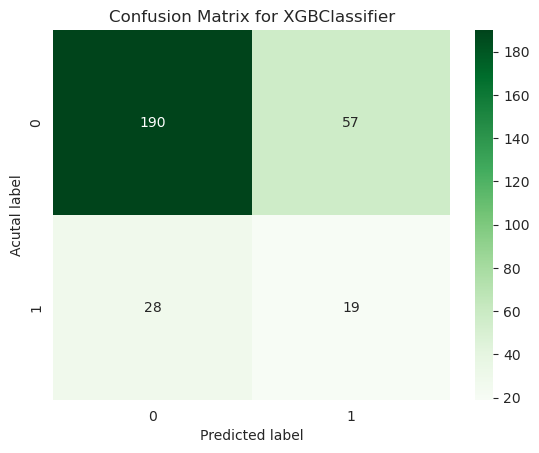

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       247
           1       0.25      0.40      0.31        47

    accuracy                           0.71       294
   macro avg       0.56      0.59      0.56       294
weighted avg       0.77      0.71      0.74       294

Using weight param 10000
XGBClassifier Accuracy: 0.6700680272108843
Cross val score: [0.70338983 0.71914894 0.74893617 0.67234043 0.71914894]


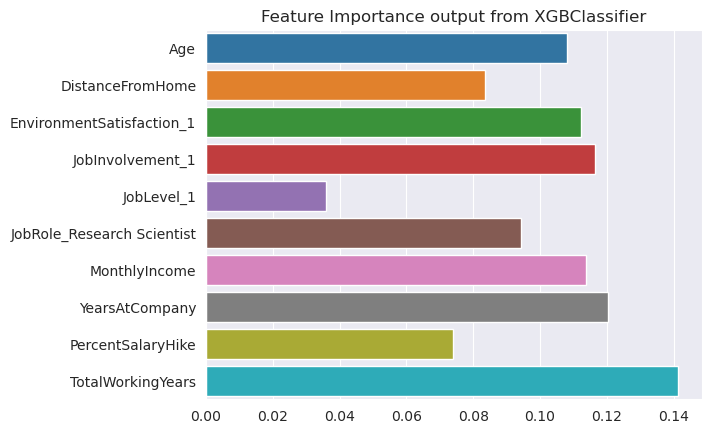

XGBClassifier


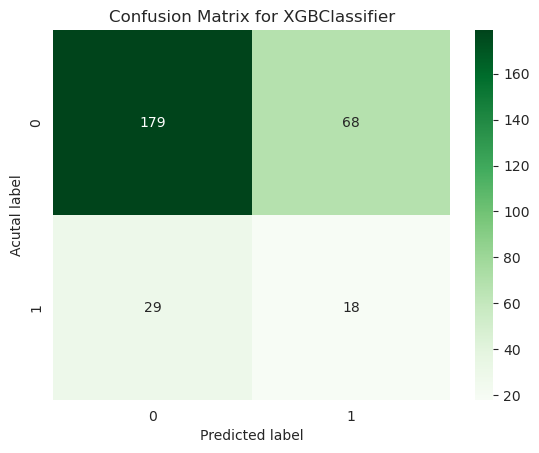

              precision    recall  f1-score   support

           0       0.86      0.72      0.79       247
           1       0.21      0.38      0.27        47

    accuracy                           0.67       294
   macro avg       0.53      0.55      0.53       294
weighted avg       0.76      0.67      0.70       294



In [244]:
weight = 1233/237
labels_out = []
weights =  [1, .25, 50, 200, 300, 1000, 10000]
for weight in weights:

    print(f"Using weight param {weight}")
    labels_d = runModels(["XGBClassifier"], [XGBClassifier(scale_pos_weight=weight, eval_metric="logloss")], *train_data, cols)
    
    labels_out.append(labels_d)

    plot_matrix(labels_d, testY)

# the first graph is even weight 1.

### Insights from these varying weights

Notice the variation in feature importance! As we apply higher weight for classifying the true positives, certain features rise in importance. Note these same features being much lower when the inverse weight is applied.

Very strange that JobLevel1 has very high prominence at certain weights. Rememeber that is the one hot encoded column signifying the lowest level of worker. Considering it is very high at the inverse .25 weight, a 0 for level1 worker may be a strong indicator that the employee will be staying. This seems to move in similar relation with JobInvolvement1, the lowest job involvment. 

(When weighted at 10000 weight, joblevel1 has much less importance for classifying these true positives)

Interesting. While it is difficult to fully understand how this classifier is working, these feature importances add good insight.

Also, check out the confusion matrix for each of these weights to determine their recall for true positives. Comparing these matricies with their feature importance is surprising. At weight 200, there is worse attririon recall than at both the lower weight (50) and higher weight (300). Also, note that excluding this 200 weight, the true positive hits a plateau around 18 classifications. The importances vary slightly with increases in weight, resulting in some features (JobLevel1 and JobInvolvment1) with high variance over the weights in comparison to other features.

What are the most impactful features on predicting employee attrition?

What are the most effective classifiers on predicting employee attrition?

Can we gain any insights from clustering?
